In [1]:
import json
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
with open('feature_importances.json') as f:
    data = json.load(f)

In [5]:
data

{'DAY_OF_WEEK_7': 0.050264548510313034,
 'intersection_segments_3': 0.0,
 'hwy_type_19': 0.0,
 'HOUR_0': 0.01587301678955555,
 'HOUR_21': 0.009700176306068897,
 'HOUR_17': 0.010582010261714458,
 'intersection_segments_20': 0.0017636683769524097,
 'HOUR_13': 0.006172839552164078,
 'HOUR_9': 0.006172839552164078,
 'lanes_3': 0.006172839552164078,
 'log_LAST_7_DAYS': 0.0,
 'HOUR_22': 0.010582010261714458,
 'hwy_type_0': 0.0035273367539048195,
 'signal_1': 0.0008818341884762049,
 'hwy_type_17': 0.0,
 'direction_N-S': 0.01675485074520111,
 'hwy_type_15': 0.0017636683769524097,
 'intersection_0': 0.014109347015619278,
 'MONTH_2': 0.012345679104328156,
 'HOUR_14': 0.0017636683769524097,
 'HOUR_15': 0.007054673507809639,
 'intersection_segments_9': 0.0035273367539048195,
 'intersection_segments_28': 0.0017636683769524097,
 'direction_E-W': 0.008818342350423336,
 'hwy_type_10': 0.0,
 'intersection_segments_18': 0.0026455025654286146,
 'intersection_segments_6': 0.0008818341884762049,
 'log_LAST

In [6]:
features = []
values = []

for f, v in data.items():
    features.append(f)
    values.append(v)

features = np.array(features)
values = np.array(values)

In [20]:
topIdx = np.array(values.argsort()[-20:][::-1])
topFeatures = features[topIdx]
topValues = values[topIdx]

In [21]:
topFeatures

array(['log_LAST_3650_DAYS', 'log_osm_speed', 'log_LAST_1825_DAYS',
       'DAY_OF_WEEK_1', 'DAY_OF_WEEK_7', 'DAY_OF_WEEK_0',
       'log_LAST_365_DAYS', 'HOUR_2', 'HOUR_4', 'HOUR_23',
       'direction_N-S', 'HOUR_3', 'HOUR_0', 'hwy_type_2', 'hwy_type_3',
       'intersection_0', 'HOUR_1', 'lanes_0', 'HOUR_5', 'MONTH_2'],
      dtype='<U24')

In [37]:
relabelled_features = []
newTopValues = []
i=0
day_weight = 0
hour_weight = 0
intersection_weight = 0
direction_weight = 0

for feat in topFeatures:
    if feat == 'log_SPEED_ZONE':
        relabelled_features.append('Speed Limit')
        newTopValues.append(topValues[i])
    if feat == 'log_LAST_3650_DAYS':
        relabelled_features.append('Number of crashes in last 10 years')
        newTopValues.append(topValues[i])
    if feat == "log_LAST_1825_DAYS":
        relabelled_features.append("Number of crashes in last 5 years")
        newTopValues.append(topValues[i])
    if feat == "LIGHT_COND_1":
        relabelled_features.append("Weather type")
        newTopValues.append(topValues[i])
    if feat == "DEGREE_URBAN_MELB_URBAN":
        relabelled_features.append("Nearby population density")
        newTopValues.append(topValues[i])
    if feat == 'NODE_TYPE_INT_1.0':
        relabelled_features.append("Intersection")
        newTopValues.append(topValues[i])
    if feat == 'direction_NW-SE':
        relabelled_features.append("Road direction")
        newTopValues.append(topValues[i])
    if feat == 'log_osm_speed':
        relabelled_features.append("Speed Limit")
        newTopValues.append(topValues[i])
    if feat == "DAY_OF_WEEK_1" or feat == "DAY_OF_WEEK_7" or feat =="DAY_OF_WEEK_0":
        if topValues[i] > day_weight:
            day_weight = topValues[i]
    if feat == "HOUR_2" or feat == "HOUR_4" or feat == "HOUR_23":
        if topValues[i] > hour_weight:
            hour_weight = topValues[i]
    if feat=="intersection_0" or feat=="intersection_1":
        if topValues[i] > intersection_weight:
            intersection_weight = topValues[i]
    if feat=="direction_N-S":
        if topValues[i] > direction_weight:
            direction_weight = topValues[i]
    i+=1
relabelled_features.append('Day')
newTopValues.append(day_weight)
relabelled_features.append('Hour')
newTopValues.append(hour_weight)
relabelled_features.append('Direction')
newTopValues.append(direction_weight)
relabelled_features.append('Intersection')
newTopValues.append(intersection_weight)

In [38]:
relabelled_features

['Number of crashes in last 10 years',
 'Speed Limit',
 'Number of crashes in last 5 years',
 'Day',
 'Hour',
 'Direction',
 'Intersection']

In [39]:
newTopValues

[0.07319223880767822,
 0.06437389552593231,
 0.05820105969905853,
 0.05820105969905853,
 0.019400352612137794,
 0.01675485074520111,
 0.014109347015619278]

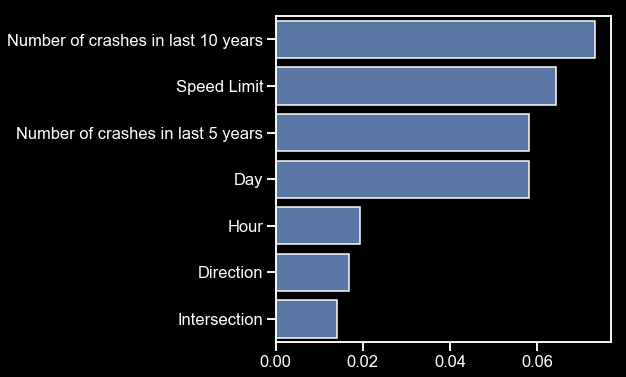

In [40]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

f, ax = plt.subplots(figsize=(6, 6))
sns_plot = sns.barplot(newTopValues, relabelled_features, color="b")

f.savefig("output.png", transparent=True, bbox_inches="tight")